In [1]:
import pandas as pd
import numpy as np
import os

csv_path = os.path.join(os.getcwd(),"spaceship-titanic")

data = pd.read_csv(os.path.join(csv_path,"train.csv"))
sub_data = pd.read_csv(os.path.join(csv_path,"test.csv"))

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
data["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [5]:
data["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [6]:
data_copy = data.copy()
# ,"RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Age","VIP"
data_copy.drop(["Name"],axis =1,inplace=True)
data_copy=data_copy[data_copy["Cabin"].notna()]
data_copy[["HomePlanet"]] = data_copy[["HomePlanet"]].fillna(value = data_copy["HomePlanet"].mode().iloc[0])
data_copy[["CryoSleep"]] = data_copy[["CryoSleep"]].fillna(value = data_copy["CryoSleep"].mode().iloc[0])
data_copy[["Destination"]] = data_copy[["Destination"]].fillna(value = data_copy["Destination"].mode().iloc[0])

data_copy[["Age"]] = data_copy[["Age"]].fillna(value = data_copy["Age"].mode().iloc[0])
data_copy[["RoomService"]] = data_copy[["RoomService"]].fillna(value = data_copy["RoomService"].mean())
data_copy[["FoodCourt"]] = data_copy[["FoodCourt"]].fillna(value = data_copy["FoodCourt"].mean())
data_copy[["ShoppingMall"]] = data_copy[["ShoppingMall"]].fillna(value = data_copy["ShoppingMall"].mean())
data_copy[["Spa"]] = data_copy[["Spa"]].fillna(value = data_copy["Spa"].mode().iloc[0])
data_copy[["VRDeck"]] = data_copy[["VRDeck"]].fillna(value = data_copy["VRDeck"].mean())
data_copy[["VIP"]] = data_copy[["VIP"]].fillna(value = data_copy["VIP"].mode().iloc[0])

In [7]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8494 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8494 non-null   object 
 1   HomePlanet    8494 non-null   object 
 2   CryoSleep     8494 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8494 non-null   object 
 5   Age           8494 non-null   float64
 6   VIP           8494 non-null   bool   
 7   RoomService   8494 non-null   float64
 8   FoodCourt     8494 non-null   float64
 9   ShoppingMall  8494 non-null   float64
 10  Spa           8494 non-null   float64
 11  VRDeck        8494 non-null   float64
 12  Transported   8494 non-null   bool   
dtypes: bool(3), float64(6), object(4)
memory usage: 754.8+ KB


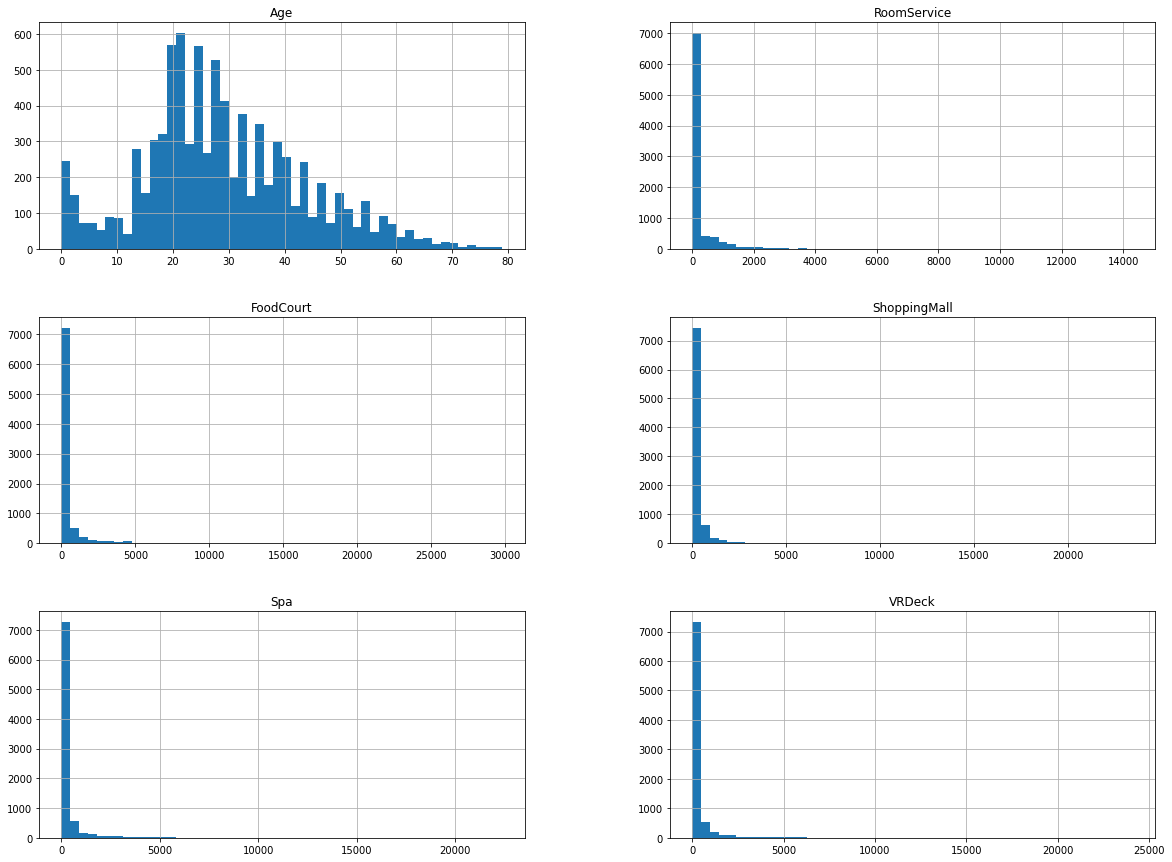

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder()
OHE_labels = OHE.fit_transform(data_copy[["HomePlanet"]])
pd.DataFrame(OHE_labels.toarray(), columns=OHE.categories_).head()
data_copy= data_copy.join(pd.DataFrame(OHE_labels.toarray(), columns=OHE.categories_))
data_copy.drop(["HomePlanet"],axis =1,inplace=True)

In [10]:
data_copy.head(5)

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,"(Earth,)","(Europa,)","(Mars,)"
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,1.0,0.0
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1.0,0.0,0.0
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0,0.0
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.0,1.0,0.0
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1.0,0.0,0.0


In [11]:
OHE_labels = OHE.fit_transform(data_copy[["Destination"]])
pd.DataFrame(OHE_labels.toarray(), columns=OHE.categories_).head()
data_copy= data_copy.join(pd.DataFrame(OHE_labels.toarray(), columns=OHE.categories_))
data_copy.drop(["Destination"],axis = 1,inplace = True)

In [12]:
data_copy.head(5)

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,"(Earth,)","(Europa,)","(Mars,)","(55 Cancri e,)","(PSO J318.5-22,)","(TRAPPIST-1e,)"
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,1.0,0.0,0.0,0.0,1.0
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1.0,0.0,0.0,0.0,0.0,1.0
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0,0.0,0.0,0.0,1.0
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.0,1.0,0.0,0.0,0.0,1.0
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1.0,0.0,0.0,0.0,0.0,1.0


In [13]:
data_copy[["deck","num","side"]] = data_copy.Cabin.str.split("/",expand=True)
data_copy.drop(["Cabin"],axis = 1,inplace = True)
data_copy.head(5)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,"(Earth,)","(Europa,)","(Mars,)","(55 Cancri e,)","(PSO J318.5-22,)","(TRAPPIST-1e,)",deck,num,side
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,1.0,0.0,0.0,0.0,1.0,B,0,P
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1.0,0.0,0.0,0.0,0.0,1.0,F,0,S
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.0,1.0,0.0,0.0,0.0,1.0,A,0,S
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.0,1.0,0.0,0.0,0.0,1.0,A,0,S
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1.0,0.0,0.0,0.0,0.0,1.0,F,1,S


In [14]:
data_copy["deck"].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: deck, dtype: int64

In [15]:
data_copy["num"].value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: num, Length: 1817, dtype: int64

In [16]:
data_copy["side"].value_counts()

S    4288
P    4206
Name: side, dtype: int64

In [17]:
data_copy["side"] = (data_copy["side"] == "P") #P=>True,S=>False

In [18]:
# data_copy.drop(["num"],axis = 1,inplace = True)

In [19]:
OHE_labels = OHE.fit_transform(data_copy[["deck"]])
pd.DataFrame(OHE_labels.toarray(), columns=OHE.categories_).head()
data_copy= data_copy.join(pd.DataFrame(OHE_labels.toarray(), columns=OHE.categories_))
data_copy.drop(["deck"],axis = 1,inplace = True)

In [20]:
data_copy.head(5)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,num,side,"(A,)","(B,)","(C,)","(D,)","(E,)","(F,)","(G,)","(T,)"
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0,True,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,0,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,0,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,0,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,1,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
data_copy.dropna(inplace=True)

In [22]:
X = data_copy.drop(["Transported"], axis = 1)
y = data_copy["Transported"]

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42) 

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [24]:
y_train.value_counts()/len(y_train)

True     0.503541
False    0.496459
Name: Transported, dtype: float64

In [25]:
y_test.value_counts()/len(y_test)

True     0.503614
False    0.496386
Name: Transported, dtype: float64

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6637 entries, 6554 to 1975
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       6637 non-null   object 
 1   CryoSleep         6637 non-null   bool   
 2   Age               6637 non-null   float64
 3   VIP               6637 non-null   bool   
 4   RoomService       6637 non-null   float64
 5   FoodCourt         6637 non-null   float64
 6   ShoppingMall      6637 non-null   float64
 7   Spa               6637 non-null   float64
 8   VRDeck            6637 non-null   float64
 9   (Earth,)          6637 non-null   float64
 10  (Europa,)         6637 non-null   float64
 11  (Mars,)           6637 non-null   float64
 12  (55 Cancri e,)    6637 non-null   float64
 13  (PSO J318.5-22,)  6637 non-null   float64
 14  (TRAPPIST-1e,)    6637 non-null   float64
 15  num               6637 non-null   object 
 16  side              6637 non-null   bool 

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train.values,y_train.values,cv=3,method="predict_proba")

In [28]:
y_scores = y_probas_forest[:,1]

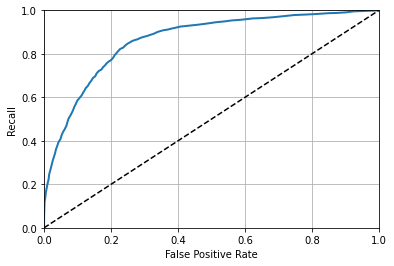

In [29]:
from sklearn.metrics import roc_curve

fpr, tpr ,thresholds = roc_curve(y_train,y_scores)

def plot_roc_curve(fpr, tpr , label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.grid(True)
    plt.xlabel("False Positive Rate")
    plt.ylabel("Recall")
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])

plot_roc_curve(fpr, tpr)

In [30]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train,y_scores)

0.8636090171623582

In [31]:
forest_clf.fit(X_train.values,y_train.values)

RandomForestClassifier(random_state=42)

In [32]:
sub_data_copy = sub_data.copy()
# ,"RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Age","VIP"
sub_data_copy.drop(["Name"],axis =1,inplace=True)
sub_data_copy[["HomePlanet"]] = sub_data_copy[["HomePlanet"]].fillna(value = sub_data_copy["HomePlanet"].mode().iloc[0])
sub_data_copy[["CryoSleep"]] = sub_data_copy[["CryoSleep"]].fillna(value = sub_data_copy["CryoSleep"].mode().iloc[0])
sub_data_copy[["Cabin"]] = sub_data_copy[["Cabin"]].fillna(value = sub_data_copy["Cabin"].mode().iloc[0])
sub_data_copy[["Destination"]] = sub_data_copy[["Destination"]].fillna(value = sub_data_copy["Destination"].mode().iloc[0])

sub_data_copy[["Age"]] = sub_data_copy[["Age"]].fillna(value = sub_data_copy["Age"].mode().iloc[0])
sub_data_copy[["RoomService"]] = sub_data_copy[["RoomService"]].fillna(value = sub_data_copy["RoomService"].mode().iloc[0])
sub_data_copy[["FoodCourt"]] = sub_data_copy[["FoodCourt"]].fillna(value = sub_data_copy["FoodCourt"].mean())
sub_data_copy[["ShoppingMall"]] = sub_data_copy[["ShoppingMall"]].fillna(value = sub_data_copy["ShoppingMall"].mode().iloc[0])
sub_data_copy[["Spa"]] = sub_data_copy[["Spa"]].fillna(value = sub_data_copy["Spa"].mode().iloc[0])
sub_data_copy[["VRDeck"]] = sub_data_copy[["VRDeck"]].fillna(value = sub_data_copy["VRDeck"].mode().iloc[0])
sub_data_copy[["VIP"]] = sub_data_copy[["VIP"]].fillna(value = sub_data_copy["VIP"].mode().iloc[0])

sub_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
dtypes: bool(2), float64(6), object(4)
memory usage: 342.6+ KB


In [33]:
sub_data_copy["CryoSleep"] = sub_data_copy["CryoSleep"].astype(int)

OHE_labels = OHE.fit_transform(sub_data_copy[["HomePlanet"]])
pd.DataFrame(OHE_labels.toarray(), columns=OHE.categories_).head()
sub_data_copy= sub_data_copy.join(pd.DataFrame(OHE_labels.toarray(), columns=OHE.categories_))
sub_data_copy.drop(["HomePlanet"],axis =1,inplace=True)

OHE_labels = OHE.fit_transform(sub_data_copy[["Destination"]])
pd.DataFrame(OHE_labels.toarray(), columns=OHE.categories_).head()
sub_data_copy= sub_data_copy.join(pd.DataFrame(OHE_labels.toarray(), columns=OHE.categories_))
sub_data_copy.drop(["Destination"],axis = 1,inplace = True)

sub_data_copy[["deck","num","side"]] = sub_data_copy.Cabin.str.split("/",expand=True)
sub_data_copy.drop(["Cabin"],axis = 1,inplace = True)
sub_data_copy["side"] = (sub_data_copy["side"] == "P") #P=>True,S=>False
sub_data_copy["side"] = sub_data_copy["side"].astype(int)

# sub_data_copy.drop(["num"],axis = 1,inplace = True)

OHE_labels = OHE.fit_transform(sub_data_copy[["deck"]])
pd.DataFrame(OHE_labels.toarray(), columns=OHE.categories_).head()
sub_data_copy= sub_data_copy.join(pd.DataFrame(OHE_labels.toarray(), columns=OHE.categories_))
sub_data_copy.drop(["deck"],axis = 1,inplace = True)

In [34]:
sub_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       4277 non-null   object 
 1   CryoSleep         4277 non-null   int32  
 2   Age               4277 non-null   float64
 3   VIP               4277 non-null   bool   
 4   RoomService       4277 non-null   float64
 5   FoodCourt         4277 non-null   float64
 6   ShoppingMall      4277 non-null   float64
 7   Spa               4277 non-null   float64
 8   VRDeck            4277 non-null   float64
 9   (Earth,)          4277 non-null   float64
 10  (Europa,)         4277 non-null   float64
 11  (Mars,)           4277 non-null   float64
 12  (55 Cancri e,)    4277 non-null   float64
 13  (PSO J318.5-22,)  4277 non-null   float64
 14  (TRAPPIST-1e,)    4277 non-null   float64
 15  num               4277 non-null   object 
 16  side              4277 non-null   int32  


In [35]:
res = pd.DataFrame(forest_clf.predict(sub_data_copy.values))

In [37]:
submission = pd.DataFrame()
submission["PassengerId"] = sub_data_copy[["PassengerId"]]
submission["Transported"] = res

In [38]:
submission.to_csv(r'C:\Users\ahmed\Desktop\Kaggle\spaceship-titanic\submission.csv',index=False)